In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Calculate the 99th percentile of the 'Age' column
percentile_99 = train['Age'].quantile(0.99)

# Clip the 'Age' column at the 99th percentile
train['Age'] = train['Age'].clip(upper=percentile_99)

In [4]:
# Calculate the 99th percentile of the 'Age' column
percentile_99 = test['Age'].quantile(0.99)

# Clip the 'Age' column at the 99th percentile
test['Age'] = test['Age'].clip(upper=percentile_99)

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.772023,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.333022,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,65.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


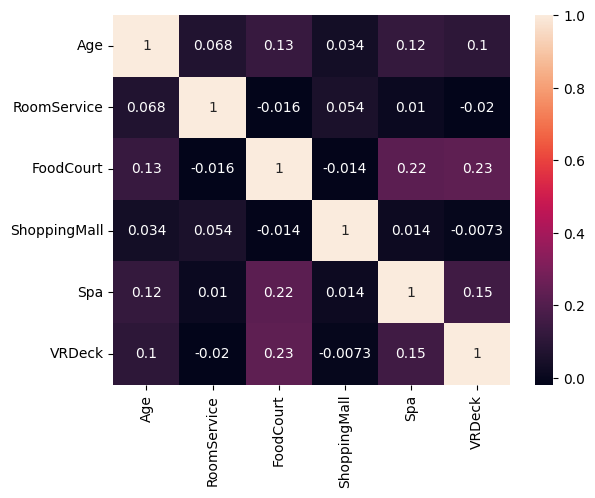

In [9]:
correlation = train.select_dtypes(include=['float64','int']).corr()
sns.heatmap(correlation,annot=True);

In [10]:
train[['Group','Person']] = train['PassengerId'].str.split('_',expand=True)

In [11]:
train[['Deck','Num','Side']] = train['Cabin'].str.split('/',expand=True)

In [12]:
train.drop(['Name','PassengerId','Cabin'],axis=1,inplace=True)

In [13]:
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [14]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Group             0
Person            0
Deck            199
Num             199
Side            199
dtype: int64

In [15]:
train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P


In [16]:
def process(df):
    df[['Group','Person']] = df['PassengerId'].str.split('_',expand=True)
    df.drop(['PassengerId','Name'],axis=1,inplace=True)
    
    df[['Deck','Num','Side']] = df['Cabin'].str.split('/',expand=True)
    df.drop(['Cabin'],axis=1,inplace=True)

In [17]:
process(test)

In [18]:
impu_num_cols = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck','Num']

impu_cat_cols = ['HomePlanet','Destination','Deck','Side','VIP']

In [19]:
imputer_num = SimpleImputer(strategy='median')
train[impu_num_cols] = imputer_num.fit_transform(train[impu_num_cols])

In [20]:
imputer_cat = SimpleImputer(strategy='most_frequent')
train[impu_cat_cols] = imputer_cat.fit_transform(train[impu_cat_cols])

In [21]:
train.isnull().sum()

HomePlanet        0
CryoSleep       217
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Person            0
Deck              0
Num               0
Side              0
dtype: int64

In [22]:
def clean(df):
    df[impu_num_cols] = imputer_num.fit_transform(df[impu_num_cols])
    df[impu_cat_cols] = imputer_cat.fit_transform(df[impu_cat_cols])

In [23]:
clean(test)

In [24]:
train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0.0,P


In [25]:
train['Leisure_Total'] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
test['Leisure_Total'] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [26]:
train['CryoSleep'] = train.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                           if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

In [27]:
train[['CryoSleep','VIP','Transported']] = train[['CryoSleep','VIP','Transported']].astype(int)

In [28]:
def mod_int(df):
    df['CryoSleep'] = df.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                           if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

    df[['CryoSleep','VIP']] = df[['CryoSleep','VIP']].astype(int)

In [29]:
mod_int(test)

In [30]:
lab_cat_cols = ['HomePlanet','Destination','Group','Person','Deck','Side']

label_encoder = LabelEncoder()

for i in lab_cat_cols:
    train[i] = label_encoder.fit_transform(train[i].astype(str))


In [31]:
train.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Group            0
Person           0
Deck             0
Num              0
Side             0
Leisure_Total    0
dtype: int64

In [32]:
def fe_cat(df):
    lab_cat_cols = ['HomePlanet','Destination','Group','Person','Deck','Side']
    
    label_encoder = LabelEncoder()
    for i in lab_cat_cols:
        df[i] = label_encoder.fit_transform(df[i].astype(str))
    return df

In [33]:
fe_cat(test)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Deck,Num,Side,Leisure_Total
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,6,3.0,1,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,5,4.0,1,2832.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,2,0.0,1,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,3,0,2,1.0,1,7418.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,4,0,5,5.0,1,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,3058,1,6,1496.0,1,0.0
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,3059,0,5,442.0,1,1018.0
4274,2,1,0,26.0,0,0.0,0.0,0.0,0.0,0.0,3060,0,3,296.0,0,0.0
4275,1,0,2,26.0,0,0.0,2680.0,0.0,0.0,523.0,3061,0,3,297.0,0,3203.0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   int32  
 1   CryoSleep      8693 non-null   int32  
 2   Destination    8693 non-null   int32  
 3   Age            8693 non-null   float64
 4   VIP            8693 non-null   int32  
 5   RoomService    8693 non-null   float64
 6   FoodCourt      8693 non-null   float64
 7   ShoppingMall   8693 non-null   float64
 8   Spa            8693 non-null   float64
 9   VRDeck         8693 non-null   float64
 10  Transported    8693 non-null   int32  
 11  Group          8693 non-null   int32  
 12  Person         8693 non-null   int32  
 13  Deck           8693 non-null   int32  
 14  Num            8693 non-null   float64
 15  Side           8693 non-null   int32  
 16  Leisure_Total  8693 non-null   float64
dtypes: float64(8), int32(9)
memory usage: 849.1 KB


In [35]:
train.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Group            0
Person           0
Deck             0
Num              0
Side             0
Leisure_Total    0
dtype: int64

In [36]:
x = train.drop('Transported',axis=1).values

In [37]:
y = train['Transported'].values

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

In [39]:
model = CatBoostClassifier()

In [42]:
model.fit(x_train,y_train)

Learning rate set to 0.024797
0:	learn: 0.6814016	total: 143ms	remaining: 2m 22s
1:	learn: 0.6694971	total: 151ms	remaining: 1m 15s
2:	learn: 0.6592683	total: 156ms	remaining: 52s
3:	learn: 0.6493090	total: 161ms	remaining: 40.2s
4:	learn: 0.6393360	total: 166ms	remaining: 33s
5:	learn: 0.6298814	total: 170ms	remaining: 28.1s
6:	learn: 0.6220208	total: 173ms	remaining: 24.6s
7:	learn: 0.6140513	total: 178ms	remaining: 22s
8:	learn: 0.6060943	total: 181ms	remaining: 20s
9:	learn: 0.5991233	total: 185ms	remaining: 18.3s
10:	learn: 0.5920563	total: 189ms	remaining: 17s
11:	learn: 0.5855899	total: 193ms	remaining: 15.9s
12:	learn: 0.5800805	total: 197ms	remaining: 15s
13:	learn: 0.5741825	total: 202ms	remaining: 14.2s
14:	learn: 0.5685006	total: 206ms	remaining: 13.6s
15:	learn: 0.5629489	total: 211ms	remaining: 13s
16:	learn: 0.5577814	total: 216ms	remaining: 12.5s
17:	learn: 0.5539880	total: 220ms	remaining: 12s
18:	learn: 0.5502472	total: 224ms	remaining: 11.6s
19:	learn: 0.5457412	tota

179:	learn: 0.3900597	total: 967ms	remaining: 4.41s
180:	learn: 0.3895234	total: 973ms	remaining: 4.4s
181:	learn: 0.3892913	total: 978ms	remaining: 4.4s
182:	learn: 0.3891427	total: 984ms	remaining: 4.39s
183:	learn: 0.3887505	total: 989ms	remaining: 4.39s
184:	learn: 0.3885907	total: 994ms	remaining: 4.38s
185:	learn: 0.3882794	total: 998ms	remaining: 4.37s
186:	learn: 0.3880945	total: 1s	remaining: 4.36s
187:	learn: 0.3878111	total: 1.01s	remaining: 4.35s
188:	learn: 0.3875029	total: 1.01s	remaining: 4.34s
189:	learn: 0.3872082	total: 1.02s	remaining: 4.33s
190:	learn: 0.3865681	total: 1.02s	remaining: 4.33s
191:	learn: 0.3863760	total: 1.02s	remaining: 4.32s
192:	learn: 0.3862080	total: 1.03s	remaining: 4.31s
193:	learn: 0.3858930	total: 1.03s	remaining: 4.3s
194:	learn: 0.3856290	total: 1.04s	remaining: 4.29s
195:	learn: 0.3853079	total: 1.04s	remaining: 4.28s
196:	learn: 0.3851295	total: 1.05s	remaining: 4.28s
197:	learn: 0.3849407	total: 1.05s	remaining: 4.27s
198:	learn: 0.3847

354:	learn: 0.3559854	total: 1.77s	remaining: 3.22s
355:	learn: 0.3558657	total: 1.78s	remaining: 3.22s
356:	learn: 0.3557085	total: 1.78s	remaining: 3.22s
357:	learn: 0.3555608	total: 1.79s	remaining: 3.21s
358:	learn: 0.3554574	total: 1.79s	remaining: 3.21s
359:	learn: 0.3553837	total: 1.8s	remaining: 3.2s
360:	learn: 0.3552776	total: 1.8s	remaining: 3.19s
361:	learn: 0.3551347	total: 1.81s	remaining: 3.19s
362:	learn: 0.3550335	total: 1.81s	remaining: 3.18s
363:	learn: 0.3548557	total: 1.82s	remaining: 3.18s
364:	learn: 0.3547611	total: 1.82s	remaining: 3.17s
365:	learn: 0.3546462	total: 1.83s	remaining: 3.17s
366:	learn: 0.3545317	total: 1.83s	remaining: 3.16s
367:	learn: 0.3544379	total: 1.84s	remaining: 3.15s
368:	learn: 0.3543195	total: 1.84s	remaining: 3.15s
369:	learn: 0.3542086	total: 1.84s	remaining: 3.14s
370:	learn: 0.3539515	total: 1.85s	remaining: 3.14s
371:	learn: 0.3538390	total: 1.85s	remaining: 3.13s
372:	learn: 0.3536851	total: 1.86s	remaining: 3.12s
373:	learn: 0.3

526:	learn: 0.3317934	total: 2.57s	remaining: 2.3s
527:	learn: 0.3316534	total: 2.57s	remaining: 2.3s
528:	learn: 0.3315171	total: 2.58s	remaining: 2.29s
529:	learn: 0.3314347	total: 2.58s	remaining: 2.29s
530:	learn: 0.3313147	total: 2.59s	remaining: 2.28s
531:	learn: 0.3311694	total: 2.59s	remaining: 2.28s
532:	learn: 0.3310815	total: 2.6s	remaining: 2.27s
533:	learn: 0.3309271	total: 2.6s	remaining: 2.27s
534:	learn: 0.3308135	total: 2.6s	remaining: 2.26s
535:	learn: 0.3307466	total: 2.61s	remaining: 2.26s
536:	learn: 0.3306611	total: 2.61s	remaining: 2.25s
537:	learn: 0.3304756	total: 2.62s	remaining: 2.25s
538:	learn: 0.3303715	total: 2.62s	remaining: 2.24s
539:	learn: 0.3302478	total: 2.63s	remaining: 2.24s
540:	learn: 0.3300214	total: 2.63s	remaining: 2.23s
541:	learn: 0.3298786	total: 2.63s	remaining: 2.23s
542:	learn: 0.3296884	total: 2.64s	remaining: 2.22s
543:	learn: 0.3295321	total: 2.64s	remaining: 2.21s
544:	learn: 0.3293813	total: 2.65s	remaining: 2.21s
545:	learn: 0.329

701:	learn: 0.3110386	total: 3.37s	remaining: 1.43s
702:	learn: 0.3108847	total: 3.37s	remaining: 1.43s
703:	learn: 0.3107623	total: 3.38s	remaining: 1.42s
704:	learn: 0.3106785	total: 3.38s	remaining: 1.42s
705:	learn: 0.3105105	total: 3.39s	remaining: 1.41s
706:	learn: 0.3104216	total: 3.39s	remaining: 1.41s
707:	learn: 0.3102759	total: 3.4s	remaining: 1.4s
708:	learn: 0.3101156	total: 3.4s	remaining: 1.4s
709:	learn: 0.3100117	total: 3.41s	remaining: 1.39s
710:	learn: 0.3098757	total: 3.41s	remaining: 1.39s
711:	learn: 0.3097668	total: 3.42s	remaining: 1.38s
712:	learn: 0.3096178	total: 3.42s	remaining: 1.38s
713:	learn: 0.3094830	total: 3.43s	remaining: 1.37s
714:	learn: 0.3092866	total: 3.43s	remaining: 1.37s
715:	learn: 0.3091491	total: 3.44s	remaining: 1.36s
716:	learn: 0.3090276	total: 3.44s	remaining: 1.36s
717:	learn: 0.3089144	total: 3.45s	remaining: 1.35s
718:	learn: 0.3087776	total: 3.45s	remaining: 1.35s
719:	learn: 0.3086297	total: 3.46s	remaining: 1.34s
720:	learn: 0.30

881:	learn: 0.2916584	total: 4.2s	remaining: 562ms
882:	learn: 0.2915141	total: 4.21s	remaining: 557ms
883:	learn: 0.2914405	total: 4.21s	remaining: 553ms
884:	learn: 0.2913026	total: 4.22s	remaining: 548ms
885:	learn: 0.2912015	total: 4.22s	remaining: 543ms
886:	learn: 0.2911652	total: 4.23s	remaining: 538ms
887:	learn: 0.2911094	total: 4.23s	remaining: 534ms
888:	learn: 0.2910368	total: 4.24s	remaining: 529ms
889:	learn: 0.2909470	total: 4.24s	remaining: 524ms
890:	learn: 0.2908551	total: 4.24s	remaining: 519ms
891:	learn: 0.2907484	total: 4.25s	remaining: 515ms
892:	learn: 0.2906282	total: 4.26s	remaining: 510ms
893:	learn: 0.2905407	total: 4.26s	remaining: 505ms
894:	learn: 0.2904776	total: 4.26s	remaining: 500ms
895:	learn: 0.2903659	total: 4.27s	remaining: 496ms
896:	learn: 0.2902963	total: 4.27s	remaining: 491ms
897:	learn: 0.2902198	total: 4.28s	remaining: 486ms
898:	learn: 0.2901548	total: 4.28s	remaining: 481ms
899:	learn: 0.2900348	total: 4.29s	remaining: 476ms
900:	learn: 0

In [43]:
model.score(x_train,y_train)

0.8863607311772977

In [44]:
model.score(x_test,y_test)

0.8080459770114943

In [45]:
predictions = model.predict(test)

In [46]:
predicted_df = pd.DataFrame({'Transported_Predictions': predictions})

In [47]:
predicted_df

,Transported_Predictions
0,1
1,0
2,1
3,1
4,0
...,...
4272,1
4273,0
4274,1
4275,1


In [48]:
sub = pd.read_csv('sample_submission.csv')

In [49]:
submission = sub.merge(predicted_df,left_index=True,right_index=True,how='left')

In [50]:
submission['Transported_Predictions'] = submission['Transported_Predictions'].astype(bool)

In [51]:
submission.drop(['Transported'],axis=1,inplace=True)

In [52]:
submission.rename(columns={'Transported_Predictions':'Transported'},inplace=True)

In [53]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [54]:
submission.to_csv(r'C:\Users\Novi\EDA\Spaceship Titanic\submission.csv', index=False)

In [55]:
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
